In [ ]:
# Mounting my google drive in colab notebook
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import joblib
from joblib import dump, load

ModuleNotFoundError: No module named 'catboost'

<a id='1'></a>
# Data Load

In [ ]:
import pandas as pd

df = pd.read_csv("/content/output3.csv")
df2 = pd.read_csv("/content/sample_beyazperde_dataset.csv")
df2

,target,text
0,Neutral,dram dolu bir film. 1000 kere izlesem usanmam ...
1,Positive,Çok kaliteli bir film.Yönetmen niccol az sayıd...
2,Positive,EN İYİ TURK FİLMİ
3,Positive,Robert Downey Jr. müthiş ötesi oynamış. Cidden...
4,Positive,"Yorum yazanlara dikkat ettimde, abartılı bulmu..."
5,Neutral,"bekleneni veremeyen, klasikleşmiş korku ve ger..."
6,Neutral,"sadece tom cruıse var diye izlenır bu fılm, be..."
7,Positive,Benim için bir sinema klasiği. İlk izlediğimde...
8,Positive,filmin dramı ve komedisiyle birleşen güzel bir...
9,Positive,Film bitti hala tam ne olup bittiğine ayıkabil...


In [ ]:
df1 = pd.read_csv("/content/sample2000binary.csv" ,on_bad_lines='skip')

df1

,Label,Text
0,True,küçük geldi ama çok güzel.
1,True,mükemmel bir ürün için teşekkürler.
2,True,bayıldım. çok güzel beklediğimden daha iyi gel...
3,True,mükemmel bir ürün için teşekkürler.
4,True,bayıldım. çok güzel beklediğimden daha iyi gel...
...,...,...
1713,True,harika bir ürün hızlı kargo teşekkürler ♥️
1714,True,ürünü 500tl indirim kuponu ile aldım. apple ka...
1715,True,anlatmaya gerek yok kalite elinize uygun fiyat...
1716,True,apple kalitesi hepsiburada güvencesi ile aynı ...


In [ ]:
import pandas as pd



# 'labels' kolonu oluşturma
df1['labels'] = df1['Label'].apply(lambda x: 'negatif' if x == False else 'pozitif' if x == True else None)

# 'labels' kolonu 'negative' olan satırları filtreleme
df_negative = df1[df1['labels'] == 'negatif']

# Sadece 'Text' ve 'labels' kolonlarını seçme
df_negative_filtered = df_negative[['Text', 'labels']]

# Yeni DataFrame'i CSV dosyasına kaydetme
df_negative_filtered.to_csv("/content/output.csv", index=False)


<a id='2'></a>
# Data Preprocessing

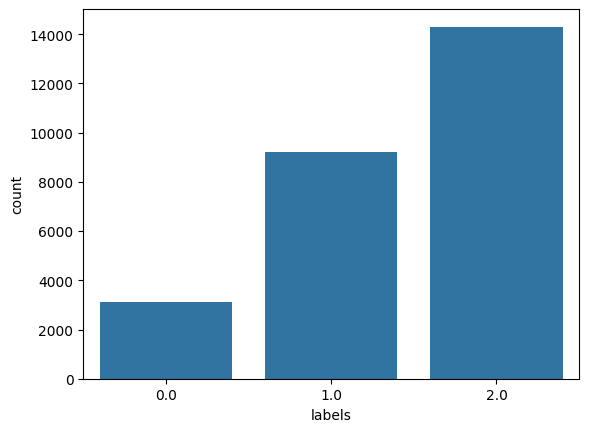

In [ ]:
sns.countplot(x = df.labels);

In [ ]:
def clean_text(text):

    unwanted_pattern = r'[!.\n,:“”,?@#"]'
    regex = re.compile(unwanted_pattern)
    cleaned_text = regex.sub(" ", text)

    return cleaned_text

df['new_text'] = df['yorum'].astype(str).apply(clean_text)
df['new_text'] = df['new_text'].str.replace("[\d]", "")
df['new_text'] = df['new_text'].str.lower()

In [ ]:
df = df.dropna()
df.isna().sum()

yorum       0
labels      0
new_text    0
dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ineffective = stopwords.words('turkish')
ineffective[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['acaba', 'ama', 'aslında', 'az', 'bazı']

In [ ]:
df['new_text'] = df['new_text'].apply(lambda x: " ".join(x for x in x.split() if x not in ineffective))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['new_text'], df['labels'], test_size=0.2, random_state=42)

tf_vector = TfidfVectorizer(max_features =  5000)
ct_vector = CountVectorizer(max_features = 5000)


X_train_vec = tf_vector.fit_transform(X_train)
X_test_vec = tf_vector.transform(X_test)

X_train_ct = ct_vector.fit_transform(X_train)
X_test_ct = ct_vector.transform(X_test)

<a id='3'></a>
# Machine Learning Model

<a id='3.1'></a>
### Naive Bayes

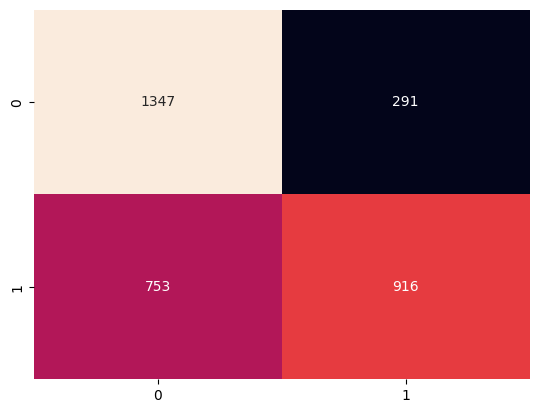

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1638
           1       0.76      0.55      0.64      1669

    accuracy                           0.68      3307
   macro avg       0.70      0.69      0.68      3307
weighted avg       0.70      0.68      0.68      3307



In [ ]:
nb_tf = BernoulliNB()
nb_tf.fit(X_train_vec, y_train)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt=".4g")
    plt.show()
    print(classification_report(y_test, y_pred))

result = pd.DataFrame(columns=['TF_Vectorizer_accuracy', 'Count_Vectorizer_accuracy',
                               'Model'])


evaluate_model(nb_tf, X_test_vec, y_test)


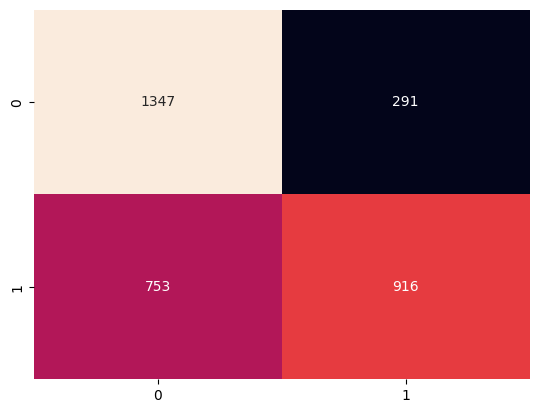

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1638
           1       0.76      0.55      0.64      1669

    accuracy                           0.68      3307
   macro avg       0.70      0.69      0.68      3307
weighted avg       0.70      0.68      0.68      3307



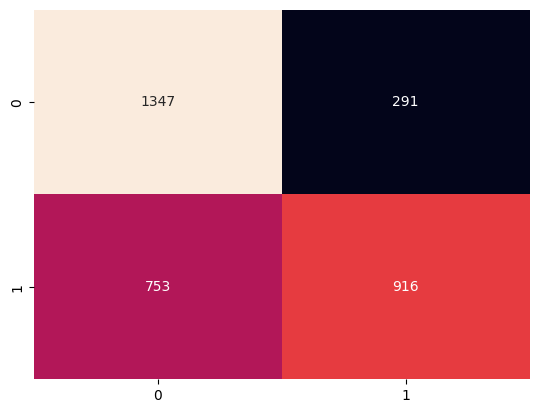

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1638
           1       0.76      0.55      0.64      1669

    accuracy                           0.68      3307
   macro avg       0.70      0.69      0.68      3307
weighted avg       0.70      0.68      0.68      3307

   TF_Vectorizer_accuracy  Count_Vectorizer_accuracy        Model
0                   0.684                      0.684  Naive Bayes


['/content/drive/MyDrive/AISentiment/Model-Token/nb_tf.joblib']

In [ ]:
nb_ct = BernoulliNB()
nb_ct.fit(X_train_ct, y_train)
# Sonuçlar için boş DataFrame
result = pd.DataFrame(columns=['TF_Vectorizer_accuracy', 'Count_Vectorizer_accuracy', 'Model'])
# Yeni satır eklemek için pd.concat kullanın
new_row = {
    'Model': 'Naive Bayes',
    'Count_Vectorizer_accuracy': nb_ct.score(X_test_ct, y_test),
    'TF_Vectorizer_accuracy': nb_tf.score(X_test_vec, y_test)
}
result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)

# Model değerlendirmesi
evaluate_model(nb_ct, X_test_ct, y_test)
evaluate_model(nb_tf, X_test_vec, y_test)

# Sonuçların güncellenmiş hali
print(result)


dump(nb_ct, '/content/drive/MyDrive/AISentiment/Model-Token/nb_ct.joblib')
dump(nb_tf, '/content/drive/MyDrive/AISentiment/Model-Token/nb_tf.joblib')

<a id='3.2'></a>
### Support Vector Machine

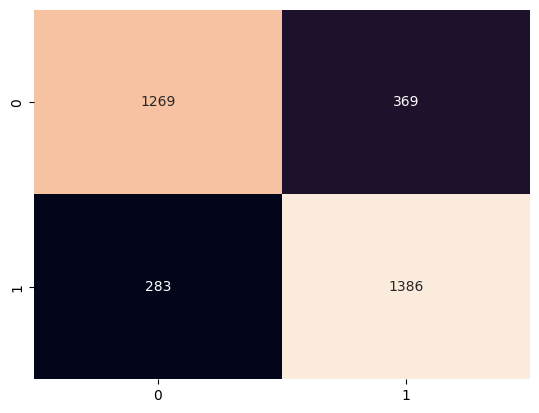

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1638
           1       0.79      0.83      0.81      1669

    accuracy                           0.80      3307
   macro avg       0.80      0.80      0.80      3307
weighted avg       0.80      0.80      0.80      3307



In [ ]:
svc_tf = SVC()
svc_tf.fit(X_train_vec, y_train)
evaluate_model(svc_tf, X_test_vec, y_test)

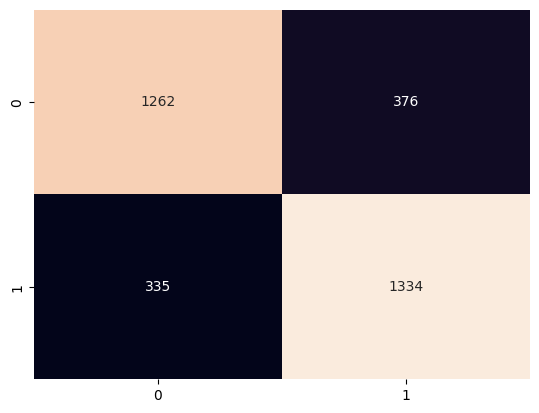

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1638
           1       0.78      0.80      0.79      1669

    accuracy                           0.79      3307
   macro avg       0.79      0.78      0.78      3307
weighted avg       0.79      0.79      0.78      3307



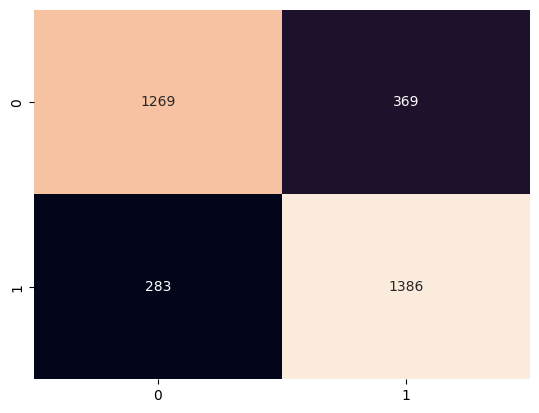

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1638
           1       0.79      0.83      0.81      1669

    accuracy                           0.80      3307
   macro avg       0.80      0.80      0.80      3307
weighted avg       0.80      0.80      0.80      3307

   TF_Vectorizer_accuracy  Count_Vectorizer_accuracy                   Model
0                   0.803                      0.785  Support Vector Machine


['/content/drive/MyDrive/AISentiment/Model-Token/svc_tf.joblib']

In [ ]:
svc_ct = SVC()
svc_ct.fit(X_train_ct, y_train)
result = pd.DataFrame(columns=['TF_Vectorizer_accuracy', 'Count_Vectorizer_accuracy', 'Model'])

# Yeni satır eklemek için pd.concat kullanın
new_row = {
    'Model': 'Support Vector Machine',
    'Count_Vectorizer_accuracy':svc_ct .score(X_test_ct, y_test),
    'TF_Vectorizer_accuracy': svc_tf.score(X_test_vec, y_test)
}
result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)

# Model değerlendirmesi,
evaluate_model(svc_ct, X_test_ct, y_test)
evaluate_model(svc_tf, X_test_vec, y_test)
# Sonuçların güncellenmiş hali
print(result)

dump(svc_ct, '/content/drive/MyDrive/AISentiment/Model-Token/svc_ct.joblib')
dump(svc_tf, '/content/drive/MyDrive/AISentiment/Model-Token/svc_tf.joblib')

<a id='3.3'></a>
### XGBOOST

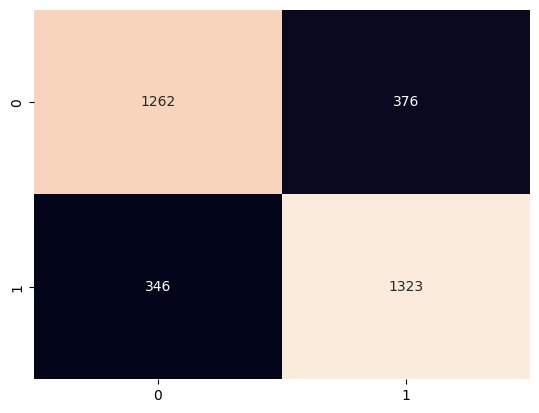

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1638
           1       0.78      0.79      0.79      1669

    accuracy                           0.78      3307
   macro avg       0.78      0.78      0.78      3307
weighted avg       0.78      0.78      0.78      3307



In [ ]:
xb_tf = XGBClassifier()
xb_tf.fit(X_train_vec, y_train)
evaluate_model(xb_tf, X_test_vec, y_test)

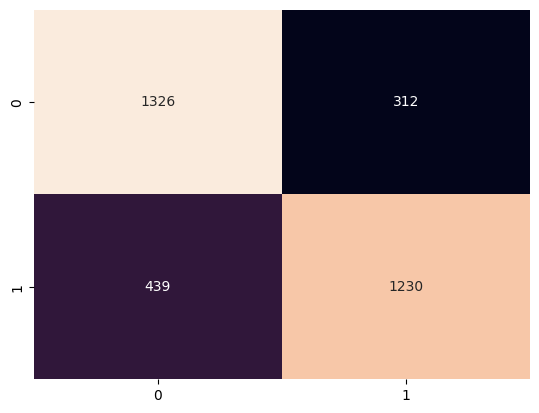

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1638
           1       0.80      0.74      0.77      1669

    accuracy                           0.77      3307
   macro avg       0.77      0.77      0.77      3307
weighted avg       0.77      0.77      0.77      3307

   TF_Vectorizer_accuracy  Count_Vectorizer_accuracy                   Model
0                   0.803                      0.785  Support Vector Machine


['/content/drive/MyDrive/AISentiment/Model-Token/xb_tf.joblib']

In [ ]:
xb_ct = XGBClassifier()
xb_ct.fit(X_train_ct, y_train)
result = pd.DataFrame(columns=['TF_Vectorizer_accuracy', 'Count_Vectorizer_accuracy', 'Model'])
result_row ={

            'Model': 'XGBOOST',
            'Count_Vectorizer_accuracy':xb_ct .score(X_test_ct, y_test),
            'TF_Vectorizer_accuracy': xb_tf.score(X_test_vec, y_test)}

result = pd.concat([result, pd.DataFrame([new_row])], ignore_index=True)
# Model değerlendirmesi
evaluate_model(xb_ct, X_test_vec, y_test)

# Sonuçların güncellenmiş hali
print(result)
dump(xb_ct, '/content/drive/MyDrive/AISentiment/Model-Token/xb_ct.joblib')
dump(xb_tf, '/content/drive/MyDrive/AISentiment/Model-Token/xb_tf.joblib')

<a id='3.4'></a>
### CATBOOST

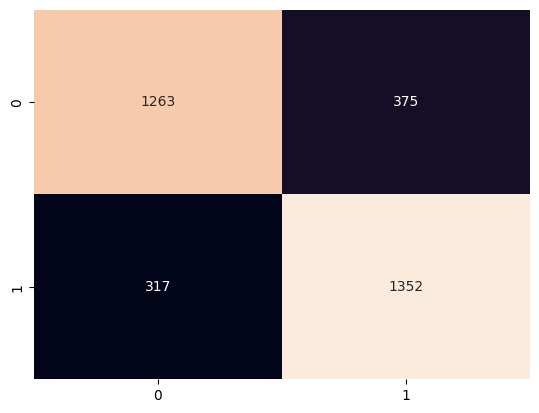

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1638
           1       0.78      0.81      0.80      1669

    accuracy                           0.79      3307
   macro avg       0.79      0.79      0.79      3307
weighted avg       0.79      0.79      0.79      3307



In [ ]:
cb_tf = CatBoostClassifier()
cb_tf.fit(X_train_vec, y_train,verbose=0)
evaluate_model(cb_tf, X_test_vec, y_test)

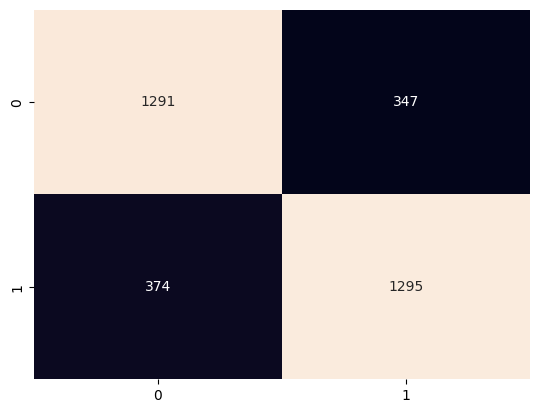

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1638
           1       0.79      0.78      0.78      1669

    accuracy                           0.78      3307
   macro avg       0.78      0.78      0.78      3307
weighted avg       0.78      0.78      0.78      3307

   TF_Vectorizer_accuracy  Count_Vectorizer_accuracy     Model
0                   0.791                      0.782  CATBOOST


['/content/drive/MyDrive/AISentiment/Model-Token/cb_tf.joblib']

In [ ]:
cb_ct = CatBoostClassifier()
cb_ct.fit(X_train_ct, y_train,verbose=0)
evaluate_model(cb_ct, X_test_ct, y_test)


result = pd.DataFrame(columns=['TF_Vectorizer_accuracy', 'Count_Vectorizer_accuracy', 'Model'])

result_row = {
              'Model': 'CATBOOST',
              'Count_Vectorizer_accuracy':cb_ct.score(X_test_ct, y_test),
              'TF_Vectorizer_accuracy': cb_tf.score(X_test_vec, y_test)}

result = pd.concat([result, pd.DataFrame([result_row])], ignore_index=True)

# Sonuçların güncellenmiş hali
print(result)
dump(cb_ct, '/content/drive/MyDrive/AISentiment/Model-Token/cb_ct.joblib')
dump(cb_tf, '/content/drive/MyDrive/AISentiment/Model-Token/cb_tf.joblib')

<a id='4.1'></a>
# ANN

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenizer'ı yarat və train datasını tokenize et
# Create Tokenizer and tokenize train data
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_df["new_text"])

# Tokenize edilmiş dataları tamamla (padding et)
# Padding tokenized data
maxlen = 200
X_train_dl = pad_sequences(tokenizer.texts_to_sequences(train_df["new_text"]), maxlen=maxlen)
X_test_dl = pad_sequences(tokenizer.texts_to_sequences(test_df["new_text"]), maxlen=maxlen)

y_train = train_df["labels"].values
y_test = test_df["labels"].values

tokenizer_path = '/content/drive/MyDrive/AISentiment/Model-Token/tokenizer.pkl'
joblib.dump(tokenizer, tokenizer_path)

print("Tokenizer kaydedildi.")

Tokenizer kaydedildi.


In [ ]:
tf.random.set_seed(42)

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape = (X_train_dl.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ann_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 34049 (133.00 KB)
Trainable params: 34049 (133.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss',
                                                   patience=2,
                                                   mode='min',
                                                   restore_best_weights=True)


In [ ]:
history_ann = ann_model.fit(X_train_dl, y_train, validation_data=(X_test_dl, y_test),
                            epochs= 20, batch_size=32, callbacks = [early_stopping])

Epoch 1/20
414/414 [==============================] - 4s 4ms/step - loss: 41.5394 - accuracy: 0.5394 - val_loss: 16.8395 - val_accuracy: 0.5634
Epoch 2/20
414/414 [==============================] - 1s 3ms/step - loss: 10.8386 - accuracy: 0.5793 - val_loss: 8.2508 - val_accuracy: 0.5779
Epoch 3/20
414/414 [==============================] - 1s 3ms/step - loss: 4.7973 - accuracy: 0.6102 - val_loss: 5.1910 - val_accuracy: 0.5912
Epoch 4/20
414/414 [==============================] - 1s 3ms/step - loss: 2.6222 - accuracy: 0.6371 - val_loss: 3.8147 - val_accuracy: 0.5685
Epoch 5/20
414/414 [==============================] - 1s 3ms/step - loss: 1.5426 - accuracy: 0.6660 - val_loss: 3.5160 - val_accuracy: 0.5579
Epoch 6/20
414/414 [==============================] - 1s 3ms/step - loss: 1.1348 - accuracy: 0.6717 - val_loss: 2.8341 - val_accuracy: 0.5570
Epoch 7/20
414/414 [==============================] - 1s 3ms/step - loss: 0.9031 - accuracy: 0.6828 - val_loss: 1.8828 - val_accuracy: 0.5900
Epo

In [ ]:
def evaluate_model_dl(model, X_test, y_test):
    y_pred = (model.predict(X_test_dl) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cbar=False, fmt=".4g")
    plt.show()
    print(classification_report(y_test, y_pred))

result_dl = pd.DataFrame(columns=['Accuracy', 'Model'])

104/104 [==============================] - 0s 1ms/step


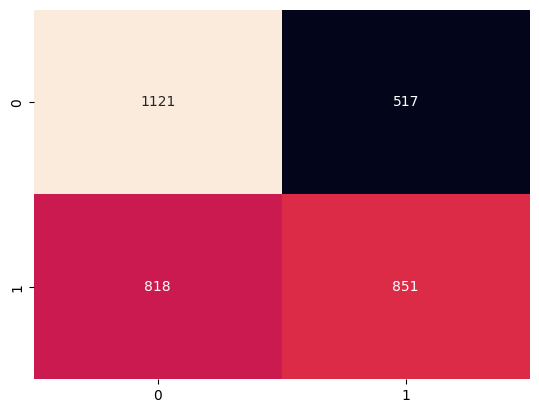

              precision    recall  f1-score   support

           0       0.58      0.68      0.63      1638
           1       0.62      0.51      0.56      1669

    accuracy                           0.60      3307
   macro avg       0.60      0.60      0.59      3307
weighted avg       0.60      0.60      0.59      3307



In [ ]:

evaluate_model_dl(ann_model, X_test_dl, y_test)

In [ ]:
# Başlangıçta boş bir DataFrame var
new_row = {
    'Model': 'ANN',
    'Accuracy':ann_model.evaluate(X_test_dl, y_test)[1]}

# Yeni satırı mevcut DataFrame ile birleştirin
result = pd.concat([result_dl, pd.DataFrame([new_row])], ignore_index=True)
result
ann_model.save('/content/drive/MyDrive/AISentiment/Model-Token/result_ANN_DL.h5')

104/104 [==============================] - 0s 2ms/step - loss: 0.8673 - accuracy: 0.5963


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id='4.2'></a>
# Embedding

In [ ]:
tf.random.set_seed(42)

em_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 16, input_length=maxlen),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

em_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

em_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_max_pooling1d (Glob  (None, 16)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 64)                1088      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 161153 (629.50 KB)
Trainable params: 161153 (629.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_em = em_model.fit(X_train_dl, y_train, validation_data=(X_test_dl, y_test),
                            epochs= 20, batch_size=32, callbacks = [early_stopping])

Epoch 1/20
414/414 [==============================] - 37s 88ms/step - loss: 0.5828 - accuracy: 0.7012 - val_loss: 0.4922 - val_accuracy: 0.7741
Epoch 2/20
414/414 [==============================] - 16s 38ms/step - loss: 0.4352 - accuracy: 0.8059 - val_loss: 0.4774 - val_accuracy: 0.7880
Epoch 3/20
414/414 [==============================] - 9s 21ms/step - loss: 0.3606 - accuracy: 0.8494 - val_loss: 0.4760 - val_accuracy: 0.7904
Epoch 4/20
414/414 [==============================] - 4s 10ms/step - loss: 0.3008 - accuracy: 0.8816 - val_loss: 0.4938 - val_accuracy: 0.7850
Epoch 5/20
414/414 [==============================] - 4s 11ms/step - loss: 0.2479 - accuracy: 0.9053 - val_loss: 0.5365 - val_accuracy: 0.7826


104/104 [==============================] - 0s 1ms/step


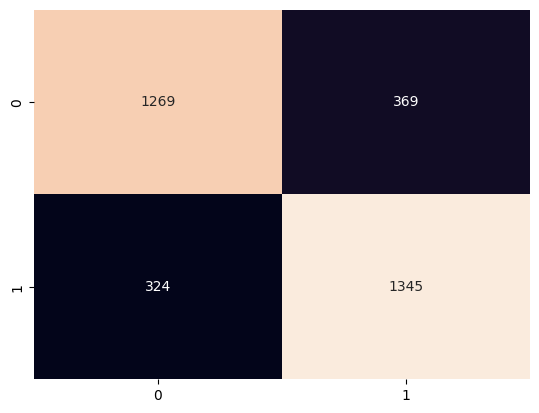

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1638
           1       0.78      0.81      0.80      1669

    accuracy                           0.79      3307
   macro avg       0.79      0.79      0.79      3307
weighted avg       0.79      0.79      0.79      3307



In [ ]:
evaluate_model_dl(em_model, X_test_dl, y_test)

In [ ]:
# Başlangıçta boş bir DataFrame var
result_dl = pd.DataFrame(columns=['Model', 'Accuracy'])

# Yeni bir satır eklemek için dictionary ile DataFrame oluşturun
new_row = {
    'Model': 'Embedding',
    'Accuracy': em_model.evaluate(X_test_dl, y_test)[1]
}

# Yeni satırı mevcut DataFrame ile birleştirin
result_dl = pd.concat([result_dl, pd.DataFrame([new_row])], ignore_index=True)
result_dl
em_model.save('/content/drive/MyDrive/AISentiment/Model-Token/Embedding_DL.h5')

104/104 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7904


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<a id='4.3'></a>
# CNN

In [ ]:
tf.random.set_seed(42)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 16, input_length=maxlen),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          10368     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 178689 (698.00 KB)
Trainable params: 178689 (698.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
history_cnn = cnn_model.fit(X_train_dl, y_train, validation_data=(X_test_dl, y_test),
                            epochs= 20, batch_size=32, callbacks = [early_stopping])

Epoch 1/20
414/414 [==============================] - 25s 56ms/step - loss: 0.5365 - accuracy: 0.7273 - val_loss: 0.4594 - val_accuracy: 0.7889
Epoch 2/20
414/414 [==============================] - 10s 25ms/step - loss: 0.3677 - accuracy: 0.8473 - val_loss: 0.4640 - val_accuracy: 0.7838
Epoch 3/20
414/414 [==============================] - 6s 15ms/step - loss: 0.2460 - accuracy: 0.9090 - val_loss: 0.5330 - val_accuracy: 0.7847


104/104 [==============================] - 0s 1ms/step


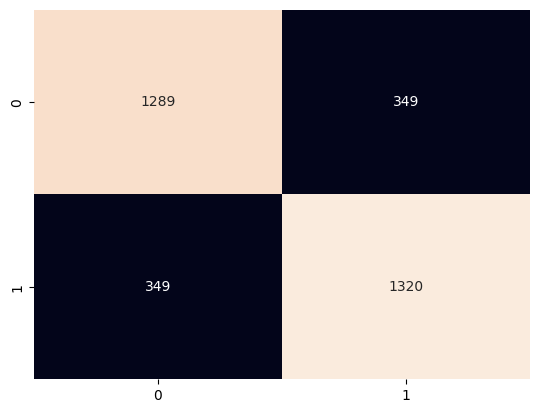

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1638
           1       0.79      0.79      0.79      1669

    accuracy                           0.79      3307
   macro avg       0.79      0.79      0.79      3307
weighted avg       0.79      0.79      0.79      3307

104/104 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7889
  Model  Accuracy
0   CNN     0.789


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
evaluate_model_dl(cnn_model, X_test_dl, y_test)

# Başlangıçta boş bir DataFrame var
result_dl = pd.DataFrame(columns=['Model', 'Accuracy'])

# Yeni bir satır eklemek için dictionary ile DataFrame oluşturun
new_row = {
    'Model': 'CNN',
    'Accuracy': cnn_model.evaluate(X_test_dl, y_test)[1]}

result_dl = pd.concat([result_dl, pd.DataFrame([new_row])], ignore_index=True)

# Sonuçları inceleyin
print(result_dl)
cnn_model.save('/content/drive/MyDrive/AISentiment/Model-Token/CNN_DL.h5')

<a id='4.4'></a>
# LSTM

In [ ]:
tf.random.set_seed(42)

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, 16, input_length=maxlen),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 168449 (658.00 KB)
Trainable params: 168449 (658.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_lstm = lstm_model.fit(X_train_dl, y_train, validation_data=(X_test_dl, y_test),
                            epochs= 20, batch_size=32, callbacks = [early_stopping])

Epoch 1/20
414/414 [==============================] - 29s 64ms/step - loss: 0.5265 - accuracy: 0.7399 - val_loss: 0.4594 - val_accuracy: 0.7917
Epoch 2/20
414/414 [==============================] - 13s 32ms/step - loss: 0.3827 - accuracy: 0.8390 - val_loss: 0.4828 - val_accuracy: 0.7862
Epoch 3/20
414/414 [==============================] - 8s 21ms/step - loss: 0.3058 - accuracy: 0.8766 - val_loss: 0.5182 - val_accuracy: 0.7750


104/104 [==============================] - 1s 4ms/step


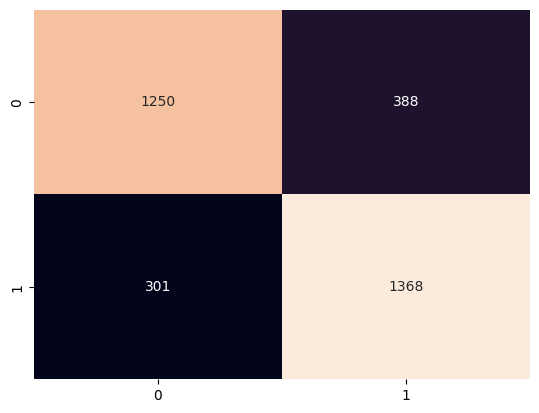

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1638
           1       0.78      0.82      0.80      1669

    accuracy                           0.79      3307
   macro avg       0.79      0.79      0.79      3307
weighted avg       0.79      0.79      0.79      3307

104/104 [==============================] - 0s 4ms/step - loss: 0.4594 - accuracy: 0.7917
  Model  Accuracy
0  LSTM     0.792


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
evaluate_model_dl(lstm_model, X_test_dl, y_test)

# Başlangıçta boş bir DataFrame var
result_dl = pd.DataFrame(columns=['Model', 'Accuracy'])

# Yeni bir satır eklemek için dictionary ile DataFrame oluşturun
new_row = {
    'Model': 'LSTM',
    'Accuracy': lstm_model.evaluate(X_test_dl, y_test)[1]}

result_dl = pd.concat([result_dl, pd.DataFrame([new_row])], ignore_index=True)

# Sonuçları inceleyin
print(result_dl)
lstm_model.save('/content/drive/MyDrive/AISentiment/Model-Token/LSTM_DL.h5')

In [ ]:
""" predict_dict = {0: 'Olumlu', 1: 'Olumsuz'}
while True:
    text = str(input('\n Write your message: '))
    if text == 'break':
        break
    ml_token = tf_vector.transform([text])
    pred_ml = svc_tf.predict(ml_token)[0]
    dl_token = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen = 200)
    pred_dl = (lstm_model.predict(dl_token) > 0.3).astype(int)[0][0]
    print(f'Machine Learning Predict = > {predict_dict[pred_ml]}\nDeep Learning Predict = > {predict_dict[pred_dl]}')

"""

" predict_dict = {0: 'Olumlu', 1: 'Olumsuz'}\nwhile True:\n    text = str(input('\n Write your message: '))\n    if text == 'break':\n        break\n    ml_token = tf_vector.transform([text])\n    pred_ml = svc_tf.predict(ml_token)[0]\n    dl_token = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen = 200)\n    pred_dl = (lstm_model.predict(dl_token) > 0.3).astype(int)[0][0]\n    print(f'Machine Learning Predict = > {predict_dict[pred_ml]}\nDeep Learning Predict = > {predict_dict[pred_dl]}')\n\n"

#HUGGENFACE BERT MODEL TRAİN-TEST

#BERT MODEL OWN DATA TRAİN

In [ ]:
!pip install transformers datasets torch


In [ ]:
#!pip install transformers datasets torch


In [ ]:
import torch
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Veri setini yükleme ve işleme
dataset = load_dataset('csv', data_files='/content/output3.csv')


train_test_split = dataset['train'].train_test_split(test_size=0.2)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Tokenizer ve veri seti hazırlığı
tokenizer = BertTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Model ve eğitim ayarları
model = BertForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-cased", num_labels=3)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
